## Dataset description
Los ficheros contienen un total 55 variables: las 3 primeras de ellas relativas a la identificación de los registros y las 8 últimas variables son distintas referencias geométricas y relativas al entorno (geometría del edificio, métricas geométricas generadas automáticamente -GEOM-, metros cuadrados, año construcción y nº de plantas de los edificios del entorno).


Las imágenes satelitales se han tratado y se ha extraído información de 4 canales (R, G, B y NIR), correspondientes a las bandas de color rojo, verde y azul, y el infrarrojo cercano. El valor mostrado corresponde a la intensidad por deciles en cada imagen. Estas variables empiezan con la letra “Q”.


### Sobre el reto
Los datos representan las características de un grupo de referencias catastrales de la zona de Madrid.  
El objetivo es predecir el uso de cada registro propuesto. Es un problema de clasificación multietiqueta: hay 6 categorías no balanceadas. 
Se presentan 2 conjuntos de datos: “Modelar…” contiene 103.230 registros con 56 variables incluyendo la variable objetivo y “Estimar…” contiene 5.618 registros con 55 variables. 
Se permite el enriquecimiento de datos, siempre y cuando se cumplan que los datos sean públicos, accesibles y legales.

### Las variables 
- La referencia catastral está ofuscada por lo que no es consultable, solo es válida como identificador de registro.  
- La información de longitud-latitud ha sido escalada y desplazada aleatoriamente (manteniendo la relación de posición con el resto de puntos). 
- El principal grupo de variables es información sobre los canales de color R-G-B e infrarrojo de las imágenes tomadas por satélite. Hay 11 variables extraídas de cada uno de estos canales, que representan el valor o densidad en cada decil.  
  - Así, la variable **Q_R_4_0_0** representa el valor para el canal Red en el decil 0, 
  - la variable **Q_G_3_0_8** representa el valor para el canal Green del decil 8 etc. 
  - La identificación “**Q_NIR…**” representa el canal en infrarrojo. 
- A continuación, hay 1 variable de área y 4 variables que condensan información de tipo geométrico sobre la parcela/registro.  
  - El **MAXBUILDINGFLOOR** se refiere a la altura máxima de los registros colindantes, no al propio registro. El año de construcción también se refiere al entorno. 
  - Por último, se presenta una variable categórica representativa de la calidad según los datos de catastro (menor valor, menor calidad). 


### La entrega intermedia 
Se habilita un día **(10 de marzo)** para presentar una “entrega intermedia”, en el que los equipos podrán enviar 2 “ficheros_respuestas” distintos (es decir, la predicción para los registros de “Estimar…”). No hay que enviar script ni presentación.  La Organización, al día siguiente, comunicará la métrica y la posición relativa del equipo en el total de la competición. Este mecanismo es optativo y no será considerado como una entrega oficial evaluable por el jurado local, tan solo será un medio para retroalimentar y mejorar vuestro trabajo. 

## Evaluación: 
#### SE VALORARÁ
- **La calidad y la técnica utilizada para generar un modelo.**
Se analizará la técnica analítica utilizada y se compararán objetivamente los valores reales frente a los valores predichos por el modelo. La métrica para maximizar es la “precisión”.
- **Comunicación.**
Que la documentación interna aportada (códigos, comentarios) esté correctamente expresada y estructurada, y sea reproducible. En la Fase de Presentación de mejores trabajos, el Jurado tendrá en cuenta que el modelado y los resultados obtenidos se transmitan de forma clara y concisa.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils import *

In [2]:
estimate = pd.read_csv("Estimar_UH2020.txt", sep = "|")

In [57]:
data = pd.read_csv("Modelar_UH2020.txt", sep = "|")

In [4]:
estimate["CLASE"] = "UNKNOWN"
total = pd.concat([data,estimate])

In [7]:
data.describe()

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR
count,1.032300e+05,1.032300e+05,1.032300e+05,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,...,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103210.000000
mean,2.208858e+09,1.655955e+08,4.578804e-05,382.633602,548.659095,684.016575,811.053925,939.978002,1080.127592,1242.841586,...,2328.363095,2738.622278,7748.293927,441.123610,0.563343,0.062482,0.061855,1.074327,1972.552436,3.766709
std,2.751723e+07,2.040199e+05,3.168761e-03,99.470870,121.439858,137.763573,153.486424,169.546408,186.422410,206.993926,...,295.852549,365.812714,2795.775635,1869.705189,0.174141,0.042849,0.042295,0.541156,22.335987,2.944896
min,2.120751e+09,1.650957e+08,0.000000e+00,151.000375,184.999420,214.000473,239.999503,269.999451,310.999493,382.999844,...,1861.006226,2172.992676,4085.049076,0.038770,0.000626,0.000679,0.000770,0.015157,1820.000000,0.000000
25%,2.194235e+09,1.654515e+08,0.000000e+00,316.997635,492.003845,632.999634,753.999597,875.008087,1006.997498,1173.999329,...,2126.002441,2478.998193,6051.309064,97.477454,0.455183,0.038255,0.038153,0.801352,1960.000000,1.000000
50%,2.205985e+09,1.655907e+08,0.000000e+00,385.000995,562.997583,698.003998,833.996582,969.999817,1115.001489,1268.997705,...,2313.999268,2688.000000,6798.207198,171.554907,0.536336,0.055802,0.055036,0.997175,1972.000000,4.000000
75%,2.224105e+09,1.657138e+08,5.786675e-07,445.002853,627.001038,770.001611,904.999988,1042.505188,1200.006226,1348.996033,...,2491.004199,2940.996704,8033.479864,343.563671,0.674723,0.078477,0.078064,1.223456,1989.000000,5.000000
max,2.287300e+09,1.665046e+08,1.016050e+00,833.999402,1016.000732,1200.003003,1377.999927,1570.504517,1806.002686,2175.694824,...,3750.997559,4614.998535,15848.608811,238058.952253,1.000000,1.785714,2.631579,68.812431,2017.000000,25.000000


In [8]:
# Distribucion de las clases en los datos
d = total[["X","CLASE"]].groupby("CLASE").count()
class_percentage = d/d["X"].sum()*100

In [9]:
d

,X
CLASE,
AGRICULTURE,338
INDUSTRIAL,4490
OFFICE,1828
OTHER,1332
PUBLIC,2976
RESIDENTIAL,90173
RETAIL,2093
UNKNOWN,5618


<BarContainer object of 8 artists>

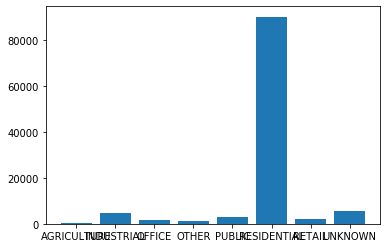

In [10]:
plt.bar(d.index, d.X)

# Correlation matrix

In [13]:
data.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
0,35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
1,F9D04BF6D037F8FB,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
2,B89D5711AFF8C423,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
3,1C3478AC1522E7E4,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4,4D12AA5009064345,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL


In [14]:
df_classes = data.CLASE.values.reshape(-1, 1)


In [15]:
data.drop(["CLASE", "ID"], axis = 1).values.shape

(103230, 54)

In [17]:
set(data.columns) - set(["X","Y"]) - set(data.columns[data.columns.str.contains("Q_")]) - set(['GEOM_R1',  'GEOM_R2',  'GEOM_R3',  'GEOM_R4'])

{'AREA',
 'CADASTRALQUALITYID',
 'CLASE',
 'CONTRUCTIONYEAR',
 'ID',
 'MAXBUILDINGFLOOR'}

In [29]:
data_processed = process_data(data)

In [24]:
data_processed.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE,AGRICULTURE,INDUSTRIAL,OFFICE,OTHER,PUBLIC,RESIDENTIAL,RETAIL
0,35984B9C3E7CD9A1,-0.054523,1.592028,-0.014450,0.606888,0.554535,0.457173,0.403570,0.407104,0.423097,...,-1.279064,1.994747,RESIDENTIAL,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,F9D04BF6D037F8FB,-0.694149,-0.648112,0.004105,0.615913,0.653327,0.624149,0.612081,0.548643,0.455278,...,-0.939493,-1.810371,RESIDENTIAL,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,B89D5711AFF8C423,1.137074,0.466902,-0.014450,-0.292863,-0.211261,-0.290460,-0.326132,-0.371452,-0.392282,...,-0.939493,0.092188,RESIDENTIAL,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1C3478AC1522E7E4,0.664611,1.659663,-0.014450,-1.152428,-1.413535,-1.495408,-1.537939,-1.509795,-1.454340,...,-0.939493,1.994747,RESIDENTIAL,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4D12AA5009064345,0.126911,0.422980,-0.014450,-0.639742,-0.466529,-0.370322,-0.352160,-0.336062,-0.327851,...,1.437501,-0.541999,RESIDENTIAL,0.0,0.0,0.0,0.0,0.0,1.0,0.0


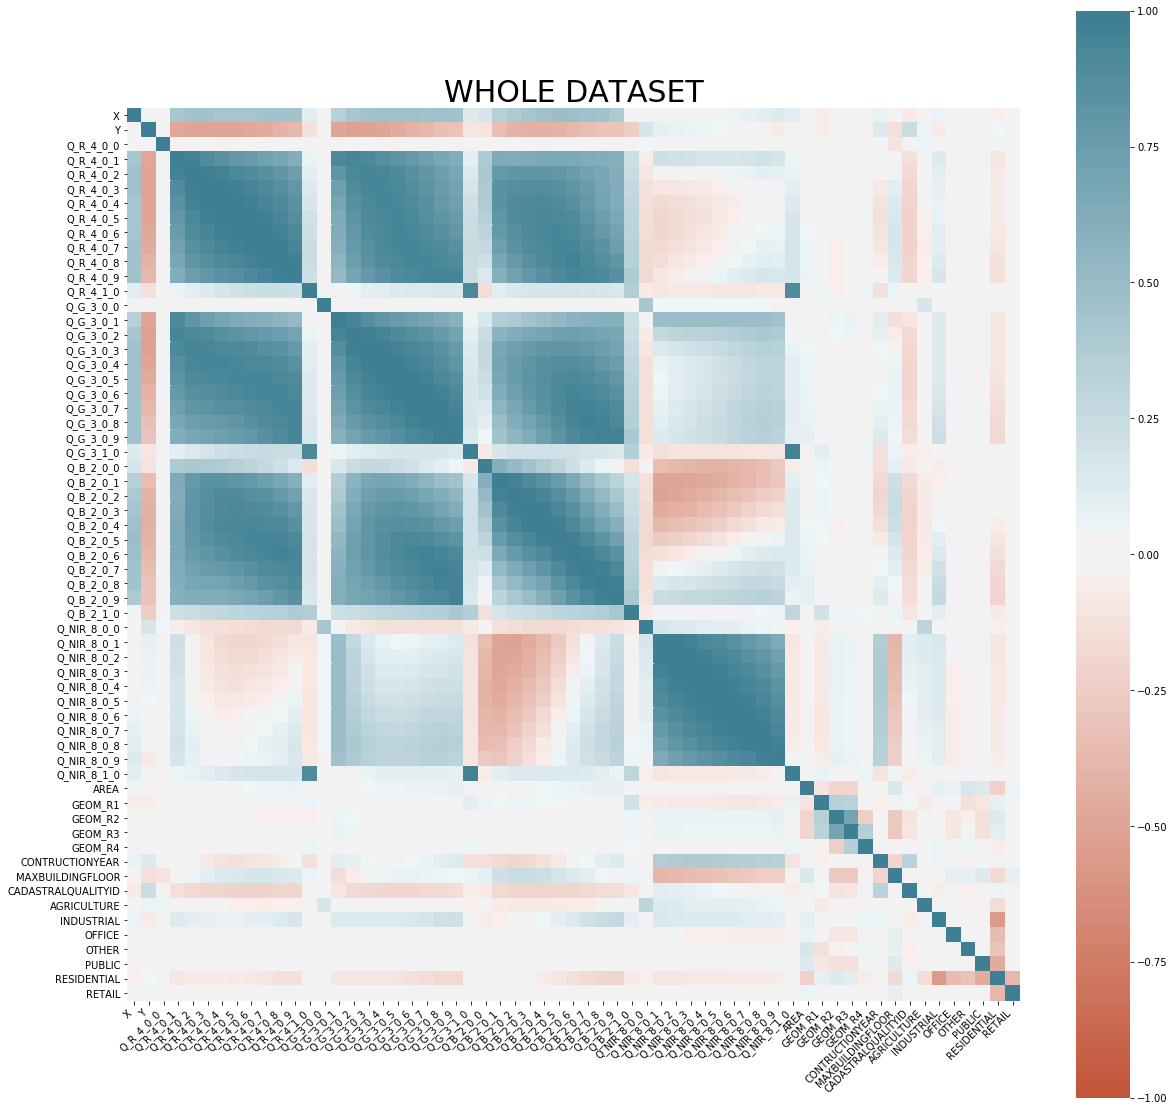

In [15]:
plot_corr(data_processed,"WHOLE DATASET")

# Corr matrix with balanced classes

In [23]:
residential_data = data[data.CLASE=="RESIDENTIAL"]
residential_sample = residential_data.sample(5000)
residential_not_in_sample = residential_data.drop(residential_sample.index)
no_residential_data = data[data.CLASE!="RESIDENTIAL"]
balanced_data = pd.concat([no_residential_data,residential_sample])


In [24]:
print(residential_data.shape)
print(residential_sample.shape)
print(residential_not_in_sample.shape)

(90173, 56)
(5000, 56)
(85173, 56)


<BarContainer object of 7 artists>

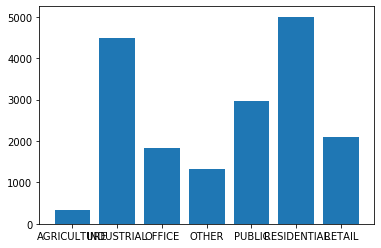

In [61]:
import random

# Datos de la clase "residential"
residential_data = data[data.CLASE=="RESIDENTIAL"]

# Escogemos 5000 índices de las instancias de manera aleatoria
residential_sample_indexes = random.sample(list(residential_data.index), 5000) 
residential_sample = residential_data.loc[residential_sample_indexes]

# Almacenamos los datos no escogidos por la muestra aleatoria
residential_not_in_sample = residential_data.drop(residential_sample_indexes)

# De los datos originales, eliminamos todos los residential
no_residential_data = data[data.CLASE!="RESIDENTIAL"]

# Unimos los datos no residential con la muestra aleatoria
balanced_data = no_residential_data.append(residential_sample)

# Distribucion de las clases en los datos
d = balanced_data[["X","CLASE"]].groupby("CLASE").count()
class_percentage = d/d["X"].sum()*100
plt.bar(d.index, d.X)


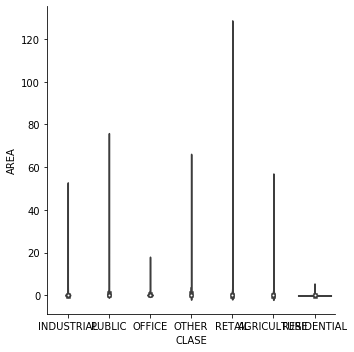

In [26]:
sns.catplot(x="CLASE", y="AREA", kind="violin", whis = 100, ci ="sd", data= balanced_data[["AREA", "CLASE"]]);

<BarContainer object of 7 artists>

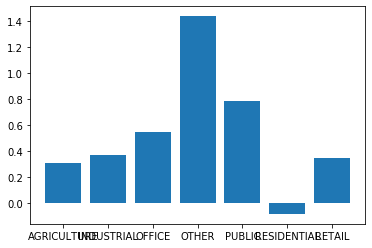

In [27]:
d = balanced_data[["AREA", "CLASE"]].groupby("CLASE").mean()
#class_percentage = d/d["X"].sum()*100
plt.bar(d.index, d.AREA)

In [58]:
balanced_data_std = process_data(balanced_data)

(18057, 56)
(18057, 56)
(18057, 56)
(18057, 56)
(18057, 56)
(18057, 7)
(18057, 63)


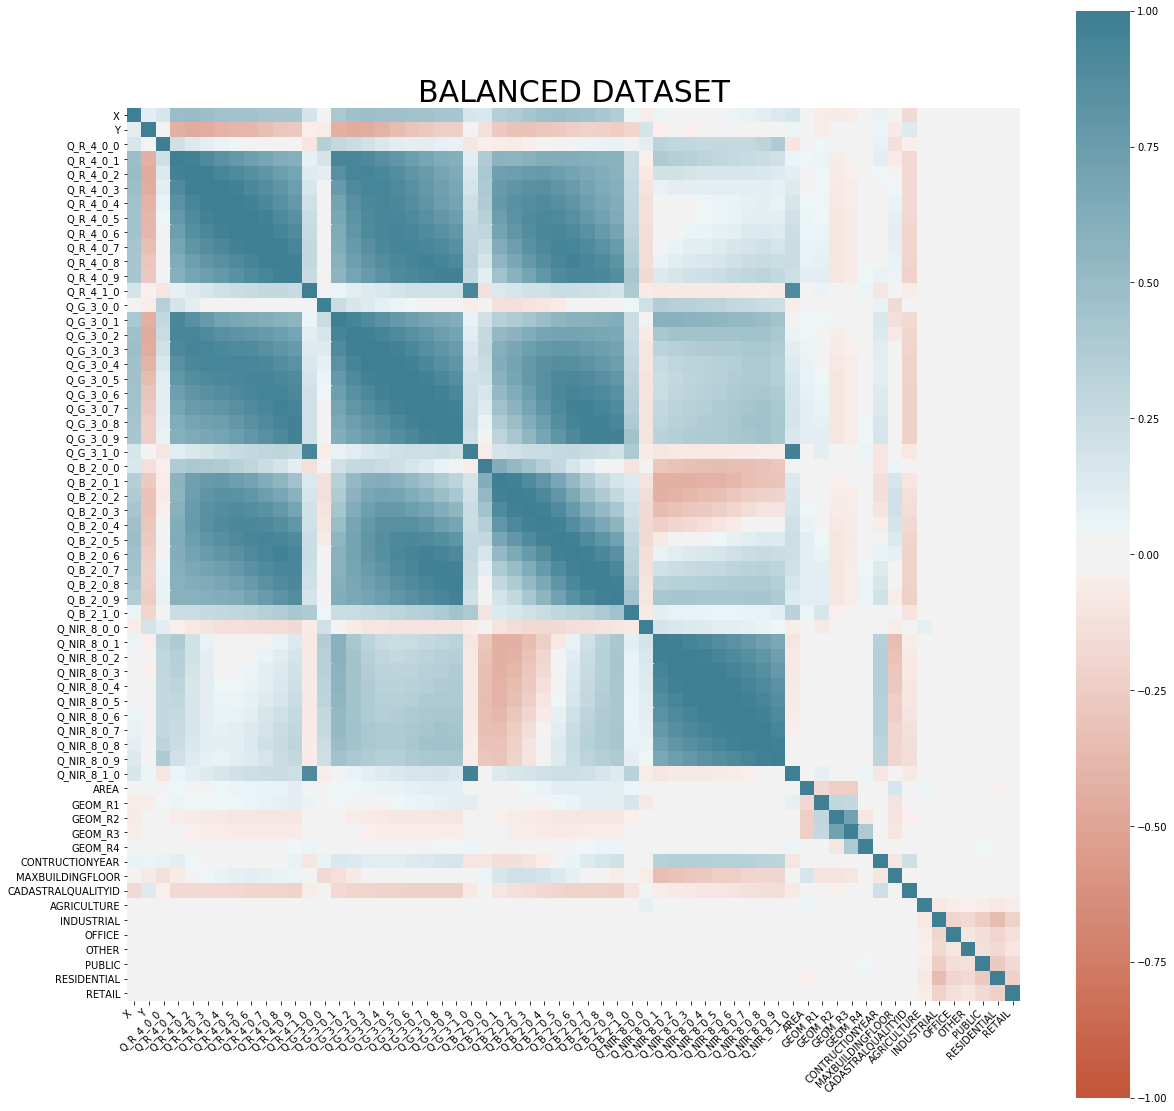

In [18]:
plot_corr(balanced_data_std, "BALANCED DATASET")

## Export data to csv

In [65]:
print(data_processed.shape)
print(balanced_data.shape)
print(balanced_data_std.shape)

(103230, 63)
(18057, 56)
(18057, 63)


In [64]:
data_processed.to_csv("data_standarized.csv")
balanced_data.to_csv("balanced_data.csv")
balanced_data_std.to_csv("balanced_data_standarized.csv")

# Plot RGB channels

In [81]:
rgbnir_cols = data.columns.str.contains("Q_")
rgbnir = data.iloc[:,rgbnir_cols]
#We normalize the data in all channels
rgbnir_std = (rgbnir - rgbnir.mean())/rgbnir.std()

In [80]:
df_r, df_g, df_b, df_nir = extract_channels(data)

In [82]:
df_r, df_g, df_b, df_nir = extract_channels(rgbnir_std)

In [83]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

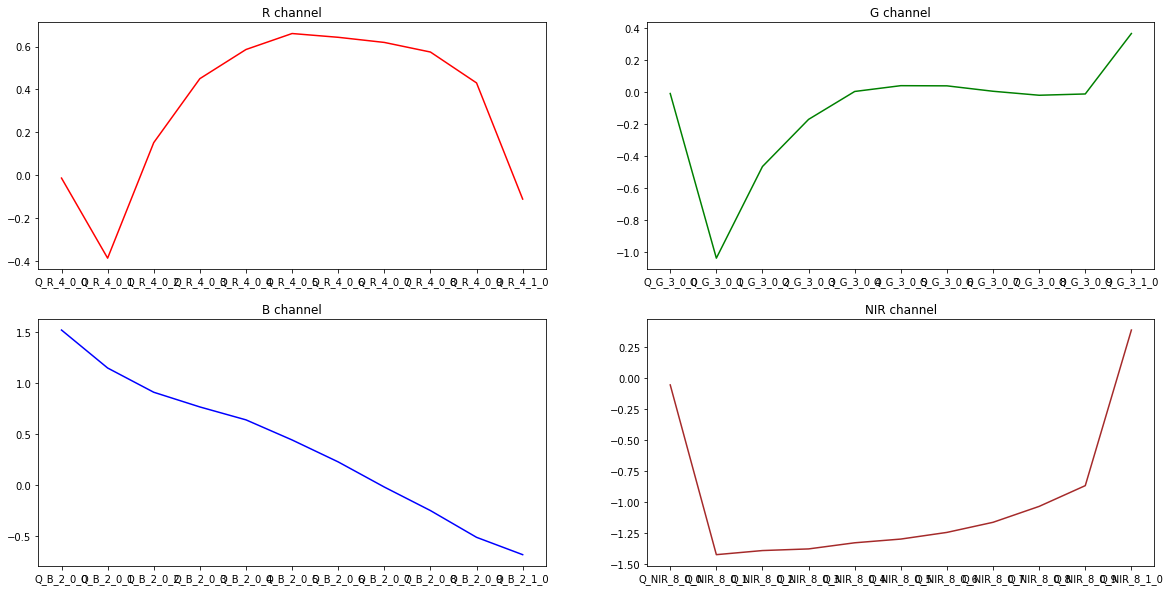

In [84]:

def f(x):
    fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2,2,figsize=(20,10))
    ax1.set_title("R channel")
    ax2.set_title("G channel")
    ax3.set_title("B channel")
    ax4.set_title("NIR channel")
    ax1.plot(df_r.iloc[x], color = "red")
    ax2.plot(df_g.iloc[x], color = "green")
    ax3.plot(df_b.iloc[x], color = "blue")
    ax4.plot(df_nir.iloc[x], color = "brown")
    
interact(f, x=20);

In [48]:
train_normalized = train.copy()
train_normalized.iloc[:,rgbnir_cols] = rgbnir
rgbnir_cols_clase = rgbnir_cols.copy()
rgbnir_cols_clase[-1] = True
group = train_normalized.iloc[:,rgbnir_cols_clase]
class_mean = group.groupby("CLASE").mean()
plot_all_channels(class_mean)

# Coordinates

Change to polar coordinates to see if predictions are more accurate

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
coor = total[["X", "Y", "CLASE"]]
c = coor[["X","Y"]]
coor_norm = (c - c.mean())/c.std()
coor_norm["CLASE"] = coor["CLASE"]
classes = coor["CLASE"].unique()
sns.set(style='ticks')

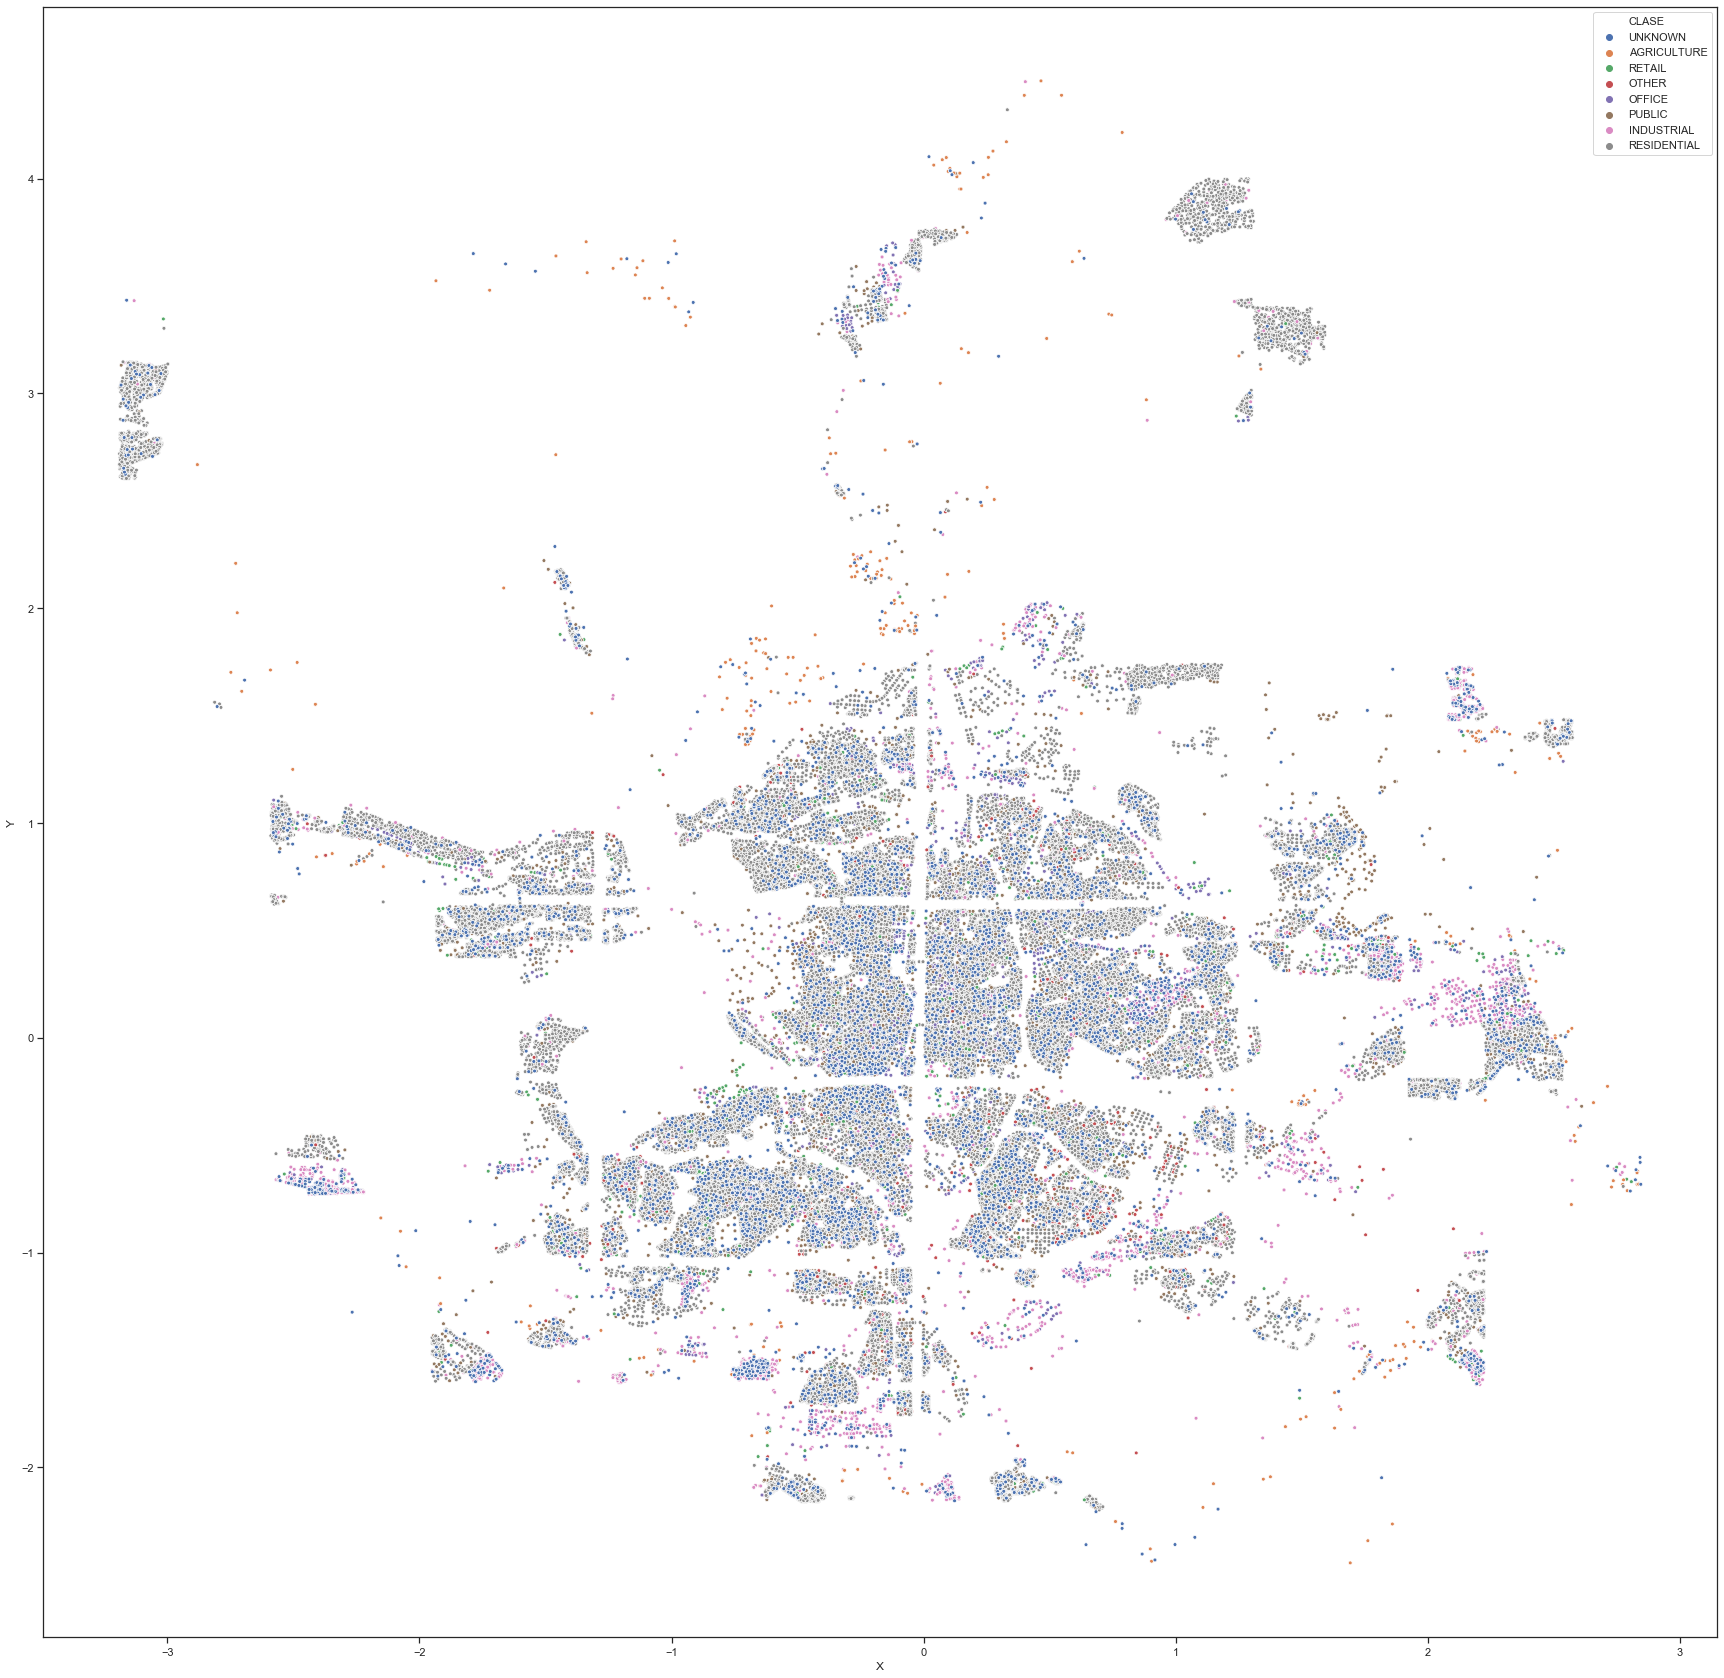

In [57]:
fig, ax = plt.subplots(figsize = (30,30))
fg = sns.scatterplot("X","Y", hue = "CLASE",hue_order= classes[::-1], data = coor_norm, ax = ax, s = 15)


In [58]:
fig.savefig("map")

In [98]:
estimate_c = estimate[["X","Y"]]
estimate_coor_norm = (estimate_c - estimate_c.mean())/estimate_c.std()


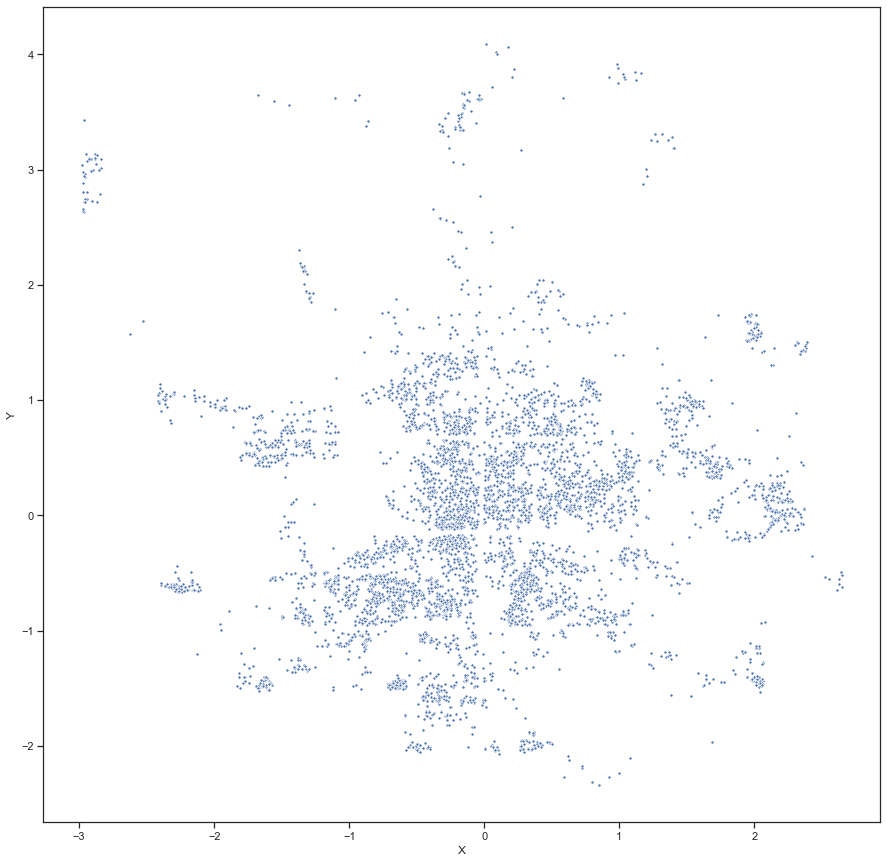

In [99]:
fig_e, ax_e = plt.subplots(figsize = (15,15))
fg = sns.scatterplot("X","Y", data = estimate_coor_norm, ax = ax_e, s = 10)

In [90]:
train_coor = normalizer(train[["X", "Y"]])
test_coor  =  normalizer(test[["X", "Y"]])
train_coor["CLASE"] = train["CLASE"]
test_coor["CLASE"]  = test["CLASE"]

rho, phi = cart2pol(train_coor["X"],train_coor["Y"])
train_coor["rho"] = rho
train_coor["phi"] = phi

rho, phi = cart2pol(test_coor["X"],test_coor["Y"])
test_coor["rho"] = rho
test_coor["phi"] = phi

In [85]:
train_coor.head()

,X,Y,CLASE,rho,phi
83556,-0.566502,0.981652,RESIDENTIAL,1.133386,2.094200
2308,-3.047601,3.047714,RESIDENTIAL,4.310039,2.356176
53181,0.039953,-0.667077,INDUSTRIAL,0.668273,-1.510975
93021,-0.809156,-0.418494,RESIDENTIAL,0.910973,-2.664281
40335,2.104924,-1.397038,RESIDENTIAL,2.526345,-0.585946


In [87]:
from sklearn.neural_network import MLPClassifier


In [89]:
mlp = MLPClassifier()
mlp.fit(train_coor[["X","Y"]], train_coor["CLASE"])

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [91]:
predictions = mlp.predict(test_coor[["X","Y"]])

In [92]:
from sklearn.metrics import classification_report

In [95]:
report = classification_report(test_coor["CLASE"], predictions, labels = classes)

In [96]:
print(report)

              precision    recall  f1-score   support

 RESIDENTIAL       0.88      1.00      0.94     18026
  INDUSTRIAL       0.77      0.17      0.27       920
      PUBLIC       0.00      0.00      0.00       608
      OFFICE       0.00      0.00      0.00       347
       OTHER       0.00      0.00      0.00       261
      RETAIL       0.00      0.00      0.00       415
 AGRICULTURE       1.00      0.01      0.03        69

    accuracy                           0.88     20646
   macro avg       0.38      0.17      0.18     20646
weighted avg       0.81      0.88      0.83     20646



In [97]:
mlp_polar = MLPClassifier()
mlp_polar.fit(train_coor[["phi","rho"]], train_coor["CLASE"])
predictions_polar = mlp_polar.predict(test_coor[["X","Y"]])

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [98]:
report_polar = classification_report(test_coor["CLASE"], predictions_polar, labels = classes)
print(report_polar)

/Users/juanluisrto/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

 RESIDENTIAL       0.88      0.55      0.68     18026
  INDUSTRIAL       0.01      0.00      0.00       920
      PUBLIC       0.00      0.00      0.00       608
      OFFICE       0.01      0.23      0.02       347
       OTHER       0.00      0.00      0.00       261
      RETAIL       0.00      0.00      0.00       415
 AGRICULTURE       1.00      0.04      0.08        69

    accuracy                           0.48     20646
   macro avg       0.27      0.12      0.11     20646
weighted avg       0.77      0.48      0.59     20646



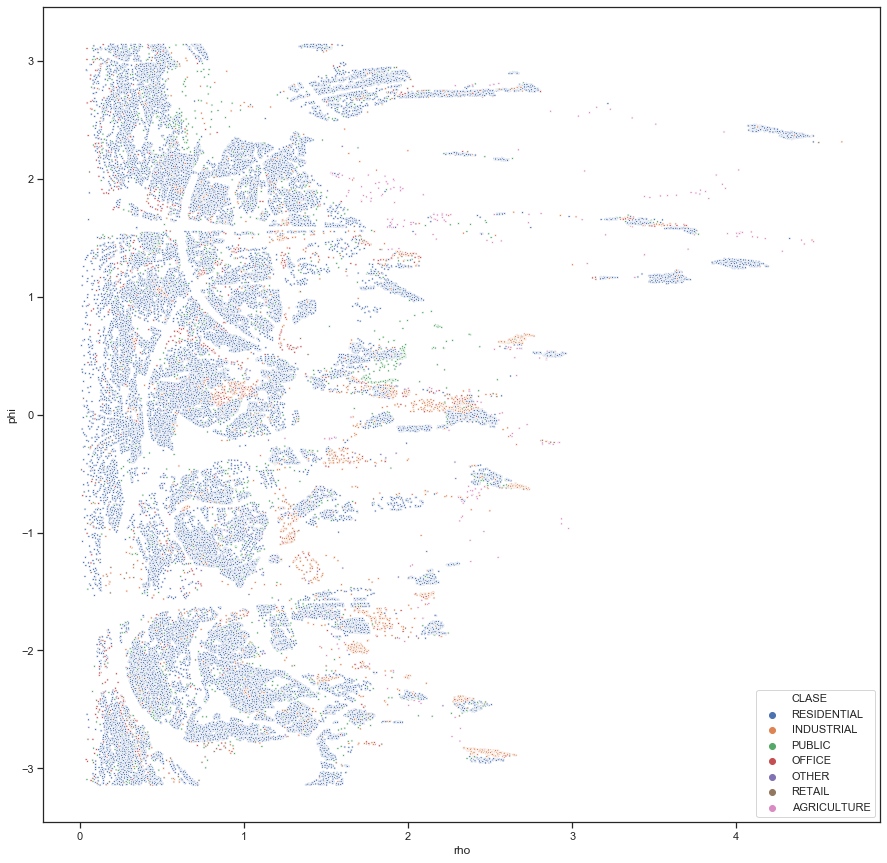

In [99]:
fig, ax = plt.subplots(figsize = (15,15))
fg = sns.scatterplot("rho","phi", hue = "CLASE",hue_order= classes, data = train_coor, ax = ax, s = 5)


In [102]:
a = np.arange(100)

In [132]:
a = np.arange(-1,1,0.05)
coordinates = []
for x in a:
    for y in a:
        coordinates.append([x,y])
c = np.array(coordinates) 

In [111]:
c = np.array(coordinates) - np.array([50,50])

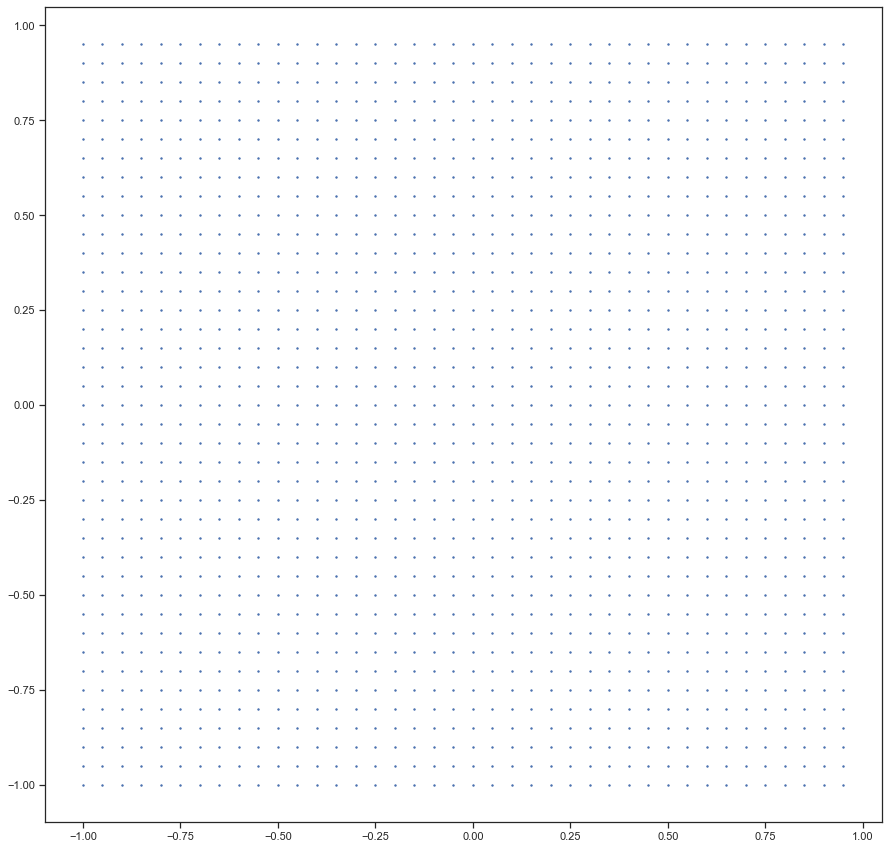

In [133]:
fig, ax = plt.subplots(figsize = (15,15))
plt.scatter(c[:,0],c[:,1], s = 2)

In [134]:
c_pol = np.array(cart2pol(c[:,0],c[:,1])).T

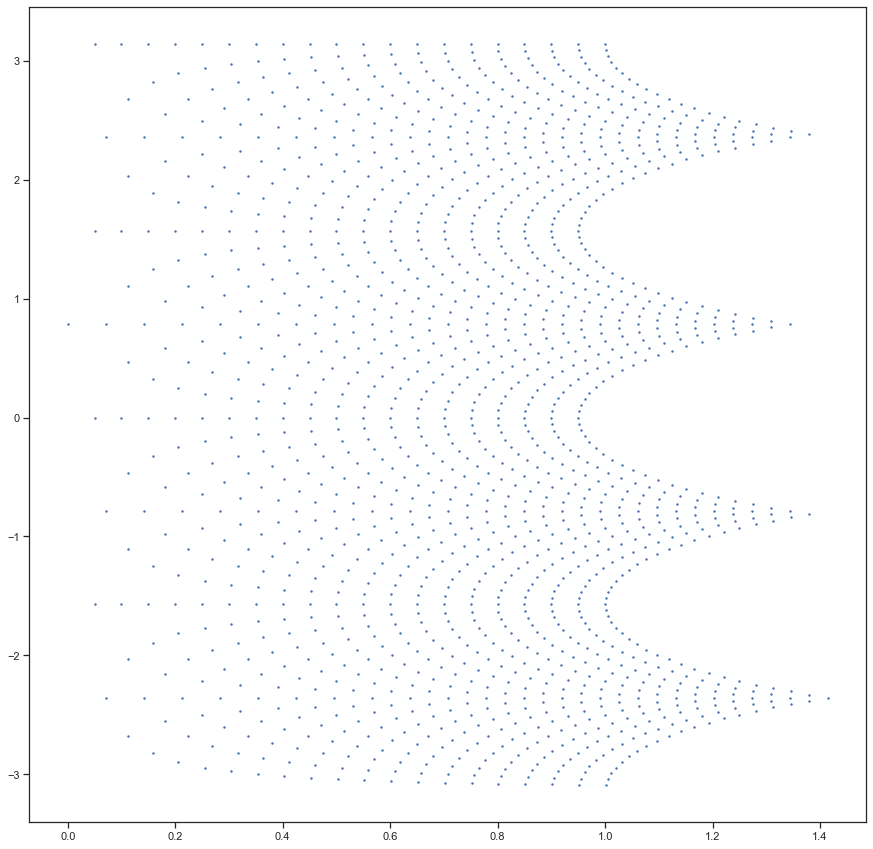

In [135]:
fig, ax = plt.subplots(figsize = (15,15))
plt.scatter(c_pol[:,0],c_pol[:,1], s = 2)

In [100]:
estimate_coor_norm["CLASE"] = "UNKNOWN"

In [106]:
train_and_predict = pd.concat([estimate_coor_norm, coor_norm[["X","Y","CLASE"]]])

## Artificial Neural Network

Incluyendo las librerías necesarias

In [30]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

División de los datos en atributos y etiquetas. También se divide el data set en dos grupos: Train and Test.

In [31]:
from sklearn.utils import shuffle

In [32]:
balanced_data_std = shuffle(balanced_data_std)
print(balanced_data_std.shape)
balanced_data_std = balanced_data_std.dropna()
print(balanced_data_std.shape)

(3169, 63)
(3164, 63)


In [11]:
# DATA

def create_features(balanced_data_std):
    TRAIN_RATE = 0.9
    balanced_data_std = balanced_data_std.dropna()
    n_instances = balanced_data_std.shape[0]

    features = balanced_data_std.drop(['CLASE','ID'], axis = 1)


    # SOFTMAX FOR THE OUTPUT
    enc = OneHotEncoder(handle_unknown='ignore', sparse = False)
    df_cls = balanced_data_std.CLASE.values.reshape(-1, 1)
    labels = pd.DataFrame(enc.fit_transform(df_cls), columns = enc.categories_[0])

    features = features.drop(labels.columns.values, axis = 1)
    return features, labels

'''
n_train = int(n_instances*TRAIN_RATE)
n_test = int((n_instances-n_train))

x_train = features.values[:n_train]
t_train = labels.values[:n_train]

x_test = features.values[n_train:n_train+n_test]
t_test = labels.values[n_train:n_train+n_test]

x_train = np.asarray(x_train)
t_train = np.asarray(t_train)
x_test = np.asarray(x_test)
t_test = np.asarray(t_test)

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_test:",x_test.shape)
print ("t_test:",t_test.shape)
'''

'\nn_train = int(n_instances*TRAIN_RATE)\nn_test = int((n_instances-n_train))\n\nx_train = features.values[:n_train]\nt_train = labels.values[:n_train]\n\nx_test = features.values[n_train:n_train+n_test]\nt_test = labels.values[n_train:n_train+n_test]\n\nx_train = np.asarray(x_train)\nt_train = np.asarray(t_train)\nx_test = np.asarray(x_test)\nt_test = np.asarray(t_test)\n\nprint ("x_train:",x_train.shape)\nprint ("t_train:",t_train.shape)\n\nprint ("x_test:",x_test.shape)\nprint ("t_test:",t_test.shape)\n'

### Initialization

In [147]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_TEST_EXAMPLES = int (round (x_test.shape[0]/1))

In [15]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, InputLayer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD
import sys
import pandas as pd
import numpy as np

### Data import

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
balanced_data = pd.read_csv("balanced_data.csv")
balanced_data_std = pd.read_csv("balanced_data_standarized.csv")
data_std = pd.read_csv("data_standarized.csv")


In [16]:
features, labels =  create_features(balanced_data_std)
x_train, x_test, t_train, t_test = train_test_split(features, labels, test_size=0.1, random_state=1)

x_train, x_dev, t_train, t_dev = train_test_split(x_train, t_train, test_size=0.1, random_state=1)

# NEURAL NET

In [37]:
n_epochs = 100 # corresponding to about 20,000 iterations
learning_rate = 0.1
batch_size = 100


In [80]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(INPUTS, activation='relu', input_dim=INPUTS))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(OUTPUTS, activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

 



In [105]:
def evaluate_and_plot(model, history):
    score = model.evaluate(x_test, t_test)
    print("loss=" + str(score[0]) + " accuracy=" + str(score[1]))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(["acc", "val_acc"])

# GRID SEARCH
https://stackabuse.com/grid-search-optimization-algorithm-in-python/

In [43]:
n_neurons_per_hlayer = [100, 100, 100, 100] 

In [149]:
def create_model(learn_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(INPUTS, activation='relu', input_dim=INPUTS))

    for neurons in n_neurons_per_hlayer:
        model.add(Dense(neurons, activation="relu"))
        model.add(Dropout(dropout_rate))
        model.add(BatchNormalization())
        
    model.add(Dense(OUTPUTS, activation="softmax"))
    
    
    save_model = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_loss')

    
    model.compile(loss="categorical_crossentropy",
              optimizer=Adam(lr=learning_rate),
              metrics=["accuracy"] )#,  callbacks=[save_model])
    
    return model



317/317 [==============================] - 4s 14ms/step
loss=1.7387087833994195 accuracy=0.4700315463054067


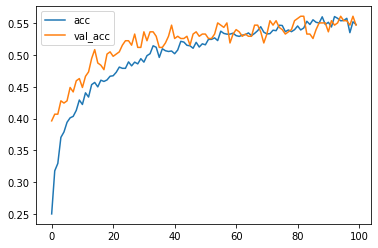

In [85]:
# Create the model
grid_model = KerasClassifier(build_fn=create_model, verbose=1)

In [88]:
grid_model.save("first_grid_model")

In [135]:
t_train.head()

,AGRICULTURE,INDUSTRIAL,OFFICE,OTHER,PUBLIC,RESIDENTIAL,RETAIL
323,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36835,0.0,0.0,0.0,0.0,0.0,1.0,0.0
90981,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78075,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10324,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [134]:
x_train.head()

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,AGRICULTURE,INDUSTRIAL,OFFICE,OTHER,PUBLIC,RESIDENTIAL,RETAIL
323,0.258627,-0.630427,-0.014450,0.352551,0.422808,0.406382,0.351522,0.253782,0.187069,0.126386,...,-0.696295,0.418789,-1.176185,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36842,-0.557016,-0.647274,-0.014450,0.144447,0.266304,0.304766,0.279898,0.241964,0.208523,0.107041,...,-0.293358,0.079219,-2.444557,0.0,0.0,0.0,0.0,0.0,1.0,0.0
91000,2.434295,0.086209,-0.013526,2.386281,1.896752,1.789203,1.804391,1.822628,1.898224,1.783439,...,1.184079,-0.939493,0.726374,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78092,-0.858214,-0.678070,0.004105,0.615913,0.653327,0.624149,0.612081,0.548643,0.455278,0.353433,...,-0.561983,-0.939493,-0.541999,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10326,0.129909,0.819769,-0.014450,-0.901089,-0.754756,-0.704214,-0.658400,-0.648667,-0.628323,-0.583809,...,-0.293358,0.418789,-1.176185,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [151]:
grid_model = create_model(learn_rate = 0.0001, dropout_rate = 0.2 )
history = grid_model.fit(x_train, t_train, batch_size=100, epochs=150, verbose=1, validation_data = (x_dev, t_dev))

Train on 2562 samples, validate on 285 samples
Epoch 1/150
2562/2562 [==============================] - 16s 6ms/step - loss: 2.0919 - acc: 0.2705 - val_loss: 2.1944 - val_acc: 0.3193
Epoch 2/150
2562/2562 [==============================] - 0s 174us/step - loss: 1.7677 - acc: 0.3314 - val_loss: 1.7942 - val_acc: 0.3684
Epoch 3/150
2562/2562 [==============================] - 0s 167us/step - loss: 1.7071 - acc: 0.3665 - val_loss: 1.7360 - val_acc: 0.3579
Epoch 4/150
2562/2562 [==============================] - 0s 172us/step - loss: 1.6730 - acc: 0.3751 - val_loss: 1.6219 - val_acc: 0.4105
Epoch 5/150
2562/2562 [==============================] - 0s 171us/step - loss: 1.6043 - acc: 0.4126 - val_loss: 1.6047 - val_acc: 0.4070
Epoch 6/150
2562/2562 [==============================] - 0s 171us/step - loss: 1.5900 - acc: 0.4204 - val_loss: 1.6401 - val_acc: 0.4211
Epoch 7/150
2562/2562 [==============================] - 0s 173us/step - loss: 1.5849 - acc: 0.4290 - val_loss: 1.5622 - val_acc: 0.

2562/2562 [==============================] - 0s 173us/step - loss: 1.1612 - acc: 0.5968 - val_loss: 1.3714 - val_acc: 0.5298
Epoch 120/150
2562/2562 [==============================] - 0s 173us/step - loss: 1.1299 - acc: 0.6081 - val_loss: 1.5132 - val_acc: 0.5404
Epoch 121/150
2562/2562 [==============================] - 0s 178us/step - loss: 1.1211 - acc: 0.6144 - val_loss: 1.2822 - val_acc: 0.5684
Epoch 122/150
2562/2562 [==============================] - 0s 170us/step - loss: 1.1028 - acc: 0.6167 - val_loss: 1.4102 - val_acc: 0.5614
Epoch 123/150
2562/2562 [==============================] - 0s 175us/step - loss: 1.1036 - acc: 0.6198 - val_loss: 1.3568 - val_acc: 0.5509
Epoch 124/150
2562/2562 [==============================] - 0s 170us/step - loss: 1.0831 - acc: 0.6230 - val_loss: 1.3915 - val_acc: 0.5053
Epoch 125/150
2562/2562 [==============================] - 0s 171us/step - loss: 1.1138 - acc: 0.6144 - val_loss: 1.5185 - val_acc: 0.5544
Epoch 126/150
2562/2562 [================

317/317 [==============================] - 0s 236us/step
loss=1.7217021138886173 accuracy=0.5141955831261463


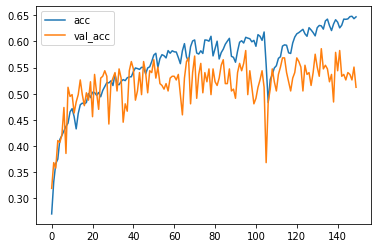

In [152]:
evaluate_and_plot(grid_model, history)

In [114]:
features_all_data, labels_all_data = create_features(data_processed)

In [118]:
x_train, x_test2, t_train, t_test2 = train_test_split(features_all_data, labels_all_data, test_size=0.1, random_state=1)

x_train, x_dev2, t_train, t_dev2 = train_test_split(x_train, t_train, test_size=0.1, random_state=1)

In [120]:
grid_model_all_data = create_model(learn_rate = 0.0001, dropout_rate = 0.2 )
history = grid_model_all_data.fit(x_train, t_train, batch_size=100, epochs=200, verbose=1, validation_data = (x_dev, t_dev))

Train on 83600 samples, validate on 285 samples
Epoch 1/200
83600/83600 [==============================] - 29s 347us/step - loss: 0.2757 - acc: 0.9159 - val_loss: 7.6302 - val_acc: 0.1789
Epoch 2/200
83600/83600 [==============================] - 13s 154us/step - loss: 0.1934 - acc: 0.9369 - val_loss: 8.2948 - val_acc: 0.1930
Epoch 3/200
83600/83600 [==============================] - 13s 158us/step - loss: 0.2439 - acc: 0.9409 - val_loss: 7.2258 - val_acc: 0.2175
Epoch 4/200
83600/83600 [==============================] - 13s 159us/step - loss: 0.1192 - acc: 0.9519 - val_loss: 9.0903 - val_acc: 0.2035
Epoch 5/200
83600/83600 [==============================] - 13s 157us/step - loss: 0.1020 - acc: 0.9569 - val_loss: 9.0793 - val_acc: 0.2105
Epoch 6/200
83600/83600 [==============================] - 13s 157us/step - loss: 0.1257 - acc: 0.9565 - val_loss: 11.3274 - val_acc: 0.2000
Epoch 7/200
83600/83600 [==============================] - ETA: 0s - loss: 0.4169 - acc: 0.949 - 13s 158us/step

KeyboardInterrupt: 

# create csv

El fichero de esta entrega intermedia optativa deberá cumplir con el formato siguiente:
Tanto el asunto del email como el nombre los ficheros deben seguir la siguiente nomenclatura:
       “Minsait_<<Centro>>_<<Nombre de Equipo>>_numeral”
       Ejemplo: “Minsait_Universidad Estatal_dataminders _1” (asunto)
       Ejemplo: “Minsait_Universidad Estatal_dataminders _1.txt” (fichero)
Filas: 5618 (sin computar la cabecera)
Columnas: 2
ID: identificación de cada registro
CLASE: valor predicho
Separador: símbolo pipe, “|”
Codificación en UTF-8

In [121]:
name = "Minsait_Universidad Politecnica Madrid_bestermans_1"
data

In [16]:
def generate_output(df, name = "Minsait_Universidad Politecnica Madrid_bestermans_2.csv"):
    df.columns =   ["ID","CLASE"]
    df.to_csv(name, sep = "|", index = False)

In [17]:
estimate.head()

,ID,CLASE
0,44198C2A811A4DF4,RESIDENTIAL
1,216F638609E0E39E,RESIDENTIAL
2,FFFCEFB11E257364,RESIDENTIAL
3,596C5C8CE10BCF,RESIDENTIAL
4,F931B9FA2A8641D1,RESIDENTIAL


In [18]:
estimate["CLASE"] = "RESIDENTIAL"

C:\Users\HPfamiliaRuiz-Tagle\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
generate_output(estimate)

In [20]:
estimate.shape

(5618, 2)

In [11]:
estimate = estimate[["ID", "CLASE"]]

In [124]:
estimate_std = process_data(estimate)
estimate_features, labels = create_features(estimate_std)

In [131]:
estimate_input = estimate_std.drop(["ID", "CLASE", "UNKNOWN"], axis = 1)

In [ ]:
data.to_csv()

In [154]:
predictions = grid_model.predict(estimate_std)

In [194]:
dictionary = {i: terreno for i , terreno in zip(range(7),t_train.columns.values)}

In [195]:
dictionary

{0: 'AGRICULTURE',
 1: 'INDUSTRIAL',
 2: 'OFFICE',
 3: 'OTHER',
 4: 'PUBLIC',
 5: 'RESIDENTIAL',
 6: 'RETAIL'}

In [202]:
results = []
for p in predictions:
    pos = np.argmax(p)
    print(pos)
    results.append(dictionary.get(pos))

3
5
5
4
3
3
4
5
3
4
3
2
6
5
5
1
4
4
1
4
4
2
5
4
2
3
4
3
1
5
2
5
4
1
5
4
3
6
3
2
4
3
4
4
1
3
5
4
3
1
4
3
2
1
1
1
1
4
1
5
1
4
1
1
1
6
4
3
4
3
4
4
6
3
2
3
4
2
1
4
4
3
1
4
2
3
1
5
4
1
3
4
5
1
4
5
4
2
1
4
3
4
5
3
4
1
3
4
4
4
1
3
4
3
4
6
4
1
1
4
1
1
3
4
4
4
4
0
1
6
6
4
4
6
5
3
4
4
1
1
3
2
6
1
5
4
3
3
1
4
4
3
1
3
4
6
4
3
4
4
5
3
1
3
6
1
1
4
4
5
3
2
5
6
4
1
2
6
0
5
6
4
1
5
4
6
1
2
3
4
1
3
3
3
3
4
4
5
3
1
4
4
1
6
3
4
6
6
2
5
1
4
3
3
4
4
6
1
1
5
4
5
3
1
5
3
2
5
1
1
4
2
3
4
4
1
1
4
1
1
4
0
0
4
3
2
4
1
2
1
4
3
3
1
4
3
5
3
6
6
4
5
2
1
3
0
3
3
3
5
1
6
1
4
3
4
0
1
3
1
4
6
2
4
6
4
4
3
3
1
5
1
4
1
6
5
3
4
0
3
4
4
4
4
2
4
3
1
4
4
2
6
4
3
4
4
5
4
3
5
4
4
1
5
4
4
1
4
4
3
4
5
4
1
1
1
4
1
4
1
1
1
1
3
1
1
4
4
1
6
4
4
1
1
1
5
5
4
4
1
6
4
1
4
6
1
4
2
4
5
1
1
3
4
6
4
2
4
4
1
4
3
2
3
5
1
0
3
1
1
3
1
4
4
4
4
3
4
3
4
2
3
0
2
5
1
2
3
5
4
4
6
1
5
5
2
3
4
4
5
4
4
2
3
2
3
4
5
1
1
5
6
1
4
4
4
1
5
3
3
5
3
3
4
5
3
4
4
4
5
3
3
1
6
0
4
3
3
1
3
5
3
3
4
4
3
1
5
3
4
4
4
5
5
4
4
1
6
1
2
3
4
0
4
1
3
3
1
3
1
1
4
6
2
4
1
4
1
1
1


5
5
4
5
4
5
3
3
1
5
5
5
4
5
0
2
4
1
5
3
5
5
5
3
4
4
4
5
4
2
3
2
5
4
5
3
1
6
5
4
5
3
5
2
4
5
3
5
5
3
5
5
4
1
5
5
5
5
5
5
5
5
5
4
5
2
5
5
5
5
5
5
5
2
5
5
5
5
3
5
5
1
5
5
3
4
5
5
5
5
5
5
4
5
4
1
4
5
2
5
5
5
3
5
3
5
5
5
5
5
5
3
5
5
3
5
5
5
5
5
4
3
3
5
5
3
5
5
4
5
5
1
5
4
5
5
5
5
6
5
4
4
5
1
5
3
5
5
3
5
3
5
5
5
4
5
1
5
5
5
4
5
3
5
5
5
1
6
5
4
4
5
5
5
4
3
5
5
5
5
5
5
1
1
4
5
4
4
4
5
4
3
5
5
5
5
3
5
5
5
3
6
5
1
3
5
5
5
4
5
5
2
5
5
5
5
5
4
5
5
3
5
5
5
5
5
5
5
3
4
5
1
4
3
5
5
5
5
5
5
5
5
5
4
5
5
5
3
5
5
5
5
5
4
5
5
5
3
6
5
5
4
1
6
3
5
1
3
5
3
3
6
5
4
5
5
5
1
5
5
5
5
5
2
5
5
5
4
5
5
5
4
1
5
3
4
2
0
4
4
1
5
5
5
5
5
6
5
5
4
5
6
4
6
4
3
5
5
5
5
4
5
5
4
5
5
1
4
5
5
3
5
1
5
5
5
5
5
5
5
4
5
3
3
5
5
6
5
5
6
5
4
5
3
5
5
6
5
5
3
5
5
3
5
4
4
3
3
3
1
4
2
4
4
5
5
4
5
5
5
5
5
5
1
5
5
4
3
4
5
5
5
4
1
1
4
4
4
5
5
5
5
5
5
5
4
5
0
5
5
5
5
5
3
5
6
5
4
5
3
6
5
5
5
5
3
6
5
5
5
3
5
4
5
1
4
5
4
4
5
5
2
1
5
5
4
4
5
5
5
4
5
4
5
5
1
5
5
5
3
5
3
5
5
5
4
5
3
5
5
4
4
5
5
5
2
4
5
3
5
5
5
5
5
5
0
5
4
5
5
5
5
4
5
5
6
5
3
4
5


In [197]:
dictionary.get(3)

'OTHER'

In [164]:
np.argmax(predictions[0])

3

In [198]:
final_result = pd.concat([estimate["ID"],pd.DataFrame(results)], axis = 1)
final_result.columns = ["ID","CLASE"]

In [199]:
final_result["CLASE"].unique()

array(['OTHER', 'RESIDENTIAL', 'PUBLIC', 'OFFICE', 'RETAIL', 'INDUSTRIAL',
       'AGRICULTURE', nan], dtype=object)

In [201]:
final_result["CLASE"].unique().shape

(8,)

In [207]:
generate_output(final_result)

In [ ]:
from sklearn.neural_network import MLPClassifier


In [224]:
data_mlp = balanced_data[["ID","X","Y","CLASE"]]
x_train, x_test, t_train, t_test = train_test_split(data_mlp.drop(["CLASE"],1), data_mlp["CLASE"], test_size=0.2, random_state=1)


In [211]:
est = estimate[["ID","X","Y","CLASE"]]

In [227]:
X = x_train.drop(["ID"],1)
labels = t_train
clf = MLPClassifier(hidden_layer_sizes=(100, 20), random_state=1)
clf.fit(X, labels)

C:\Users\HPfamiliaRuiz-Tagle\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
x_test

In [229]:
predictions = clf.predict(x_test.drop(["ID"],1))

In [231]:
from sklearn.metrics import classification_report

In [232]:
report = classification_report(t_test, predictions)


In [233]:

print(report)

              precision    recall  f1-score   support

 AGRICULTURE       0.64      0.38      0.48        71
  INDUSTRIAL       0.56      0.65      0.60       901
      OFFICE       0.30      0.28      0.29       381
       OTHER       0.36      0.09      0.14       226
      PUBLIC       0.47      0.11      0.18       624
 RESIDENTIAL       0.40      0.73      0.51       996
      RETAIL       0.32      0.08      0.13       413

    accuracy                           0.44      3612
   macro avg       0.43      0.33      0.33      3612
weighted avg       0.43      0.44      0.39      3612

